# Building  a predictive maintenance model for a delivery company

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("/kaggle/input/failure/failure.csv")

In [3]:
df.head()

,date,device,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9
0,2015-01-01,S1F01085,0,215630672,56,0,52,6,407438,0,0,7
1,2015-01-01,S1F0166B,0,61370680,0,3,0,6,403174,0,0,0
2,2015-01-01,S1F01E6Y,0,173295968,0,0,0,12,237394,0,0,0
3,2015-01-01,S1F01JE0,0,79694024,0,0,0,6,410186,0,0,0
4,2015-01-01,S1F01R2B,0,135970480,0,0,0,15,313173,0,0,3


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124494 entries, 0 to 124493
Data columns (total 12 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   date        124494 non-null  object
 1   device      124494 non-null  object
 2   failure     124494 non-null  int64 
 3   attribute1  124494 non-null  int64 
 4   attribute2  124494 non-null  int64 
 5   attribute3  124494 non-null  int64 
 6   attribute4  124494 non-null  int64 
 7   attribute5  124494 non-null  int64 
 8   attribute6  124494 non-null  int64 
 9   attribute7  124494 non-null  int64 
 10  attribute8  124494 non-null  int64 
 11  attribute9  124494 non-null  int64 
dtypes: int64(10), object(2)
memory usage: 11.4+ MB


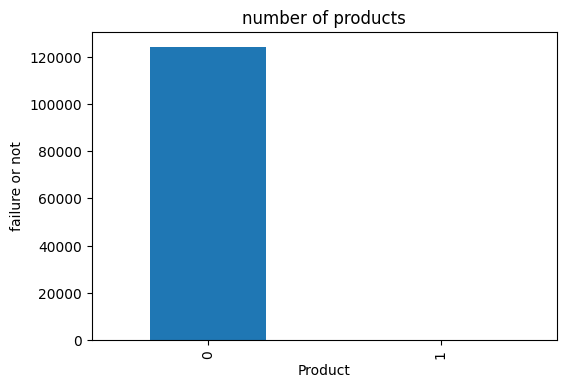

In [5]:
product_counts = df['failure'].value_counts()

plt.figure(figsize=(6, 4))
product_counts.plot(kind='bar')
plt.xlabel('Product')
plt.ylabel('failure or not')
plt.title('number of products')
plt.show()

In [6]:
df['failure'].value_counts()

failure
0    124388
1       106
Name: count, dtype: int64

In [7]:
df["date"]=pd.to_datetime(df["date"])

In [8]:
df["year"]=2024-df["date"].dt.year
df["month"]=df["date"].dt.month
df["day"]=df["date"].dt.day


In [9]:
df.head()

,date,device,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9,year,month,day
0,2015-01-01,S1F01085,0,215630672,56,0,52,6,407438,0,0,7,9,1,1
1,2015-01-01,S1F0166B,0,61370680,0,3,0,6,403174,0,0,0,9,1,1
2,2015-01-01,S1F01E6Y,0,173295968,0,0,0,12,237394,0,0,0,9,1,1
3,2015-01-01,S1F01JE0,0,79694024,0,0,0,6,410186,0,0,0,9,1,1
4,2015-01-01,S1F01R2B,0,135970480,0,0,0,15,313173,0,0,3,9,1,1


In [10]:
del df["date"]

In [11]:
# Extracting the first three letters
df['device'] = [x[:3] for x in df['device']]
df['device'].unique()

array(['S1F', 'W1F', 'Z1F'], dtype=object)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124494 entries, 0 to 124493
Data columns (total 14 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   device      124494 non-null  object
 1   failure     124494 non-null  int64 
 2   attribute1  124494 non-null  int64 
 3   attribute2  124494 non-null  int64 
 4   attribute3  124494 non-null  int64 
 5   attribute4  124494 non-null  int64 
 6   attribute5  124494 non-null  int64 
 7   attribute6  124494 non-null  int64 
 8   attribute7  124494 non-null  int64 
 9   attribute8  124494 non-null  int64 
 10  attribute9  124494 non-null  int64 
 11  year        124494 non-null  int32 
 12  month       124494 non-null  int32 
 13  day         124494 non-null  int32 
dtypes: int32(3), int64(10), object(1)
memory usage: 11.9+ MB


In [13]:
df.drop(["attribute7","year"],axis=1,inplace=True)

In [14]:
df.sample()

,device,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute8,attribute9,month,day
86679,S1F,0,209444080,0,0,0,92,249096,0,0,5,29


<Axes: xlabel='failure', ylabel='month'>

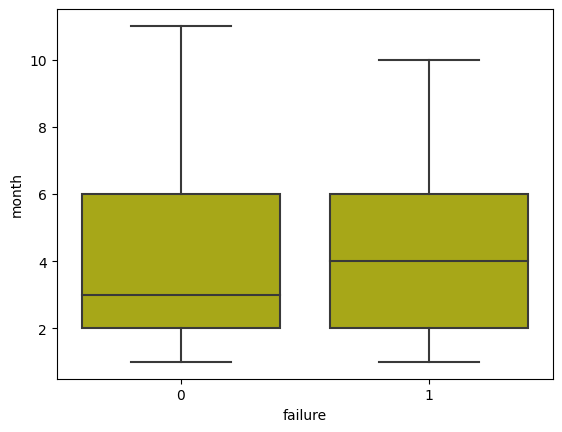

In [15]:
import seaborn as sns
sns.boxplot(x='failure',y='month',data=df,color='y')

In [16]:
df.head()

,device,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute8,attribute9,month,day
0,S1F,0,215630672,56,0,52,6,407438,0,7,1,1
1,S1F,0,61370680,0,3,0,6,403174,0,0,1,1
2,S1F,0,173295968,0,0,0,12,237394,0,0,1,1
3,S1F,0,79694024,0,0,0,6,410186,0,0,1,1
4,S1F,0,135970480,0,0,0,15,313173,0,3,1,1


In [17]:
df['attribute1'].unique()

array([215630672,  61370680, 173295968, ...,  19029120, 226953408,
        17572840])

In [18]:
df['attribute6'].unique()

array([407438, 403174, 237394, ..., 350410, 358980, 351431])

In [19]:
x = df.drop(columns=['failure'])
y = df['failure']

In [20]:
x.shape,y.shape

((124494, 11), (124494,))

In [21]:
#!pip install imbalanced-learn
#!pip install --upgrade imbalanced-learn scikit-learn
#%pip install imbalanced-learn

In [22]:
x = pd.get_dummies(x, dtype=int)

In [23]:
x.head()

,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute8,attribute9,month,day,device_S1F,device_W1F,device_Z1F
0,215630672,56,0,52,6,407438,0,7,1,1,1,0,0
1,61370680,0,3,0,6,403174,0,0,1,1,1,0,0
2,173295968,0,0,0,12,237394,0,0,1,1,1,0,0
3,79694024,0,0,0,6,410186,0,0,1,1,1,0,0
4,135970480,0,0,0,15,313173,0,3,1,1,1,0,0


# Over Sampling using Smote

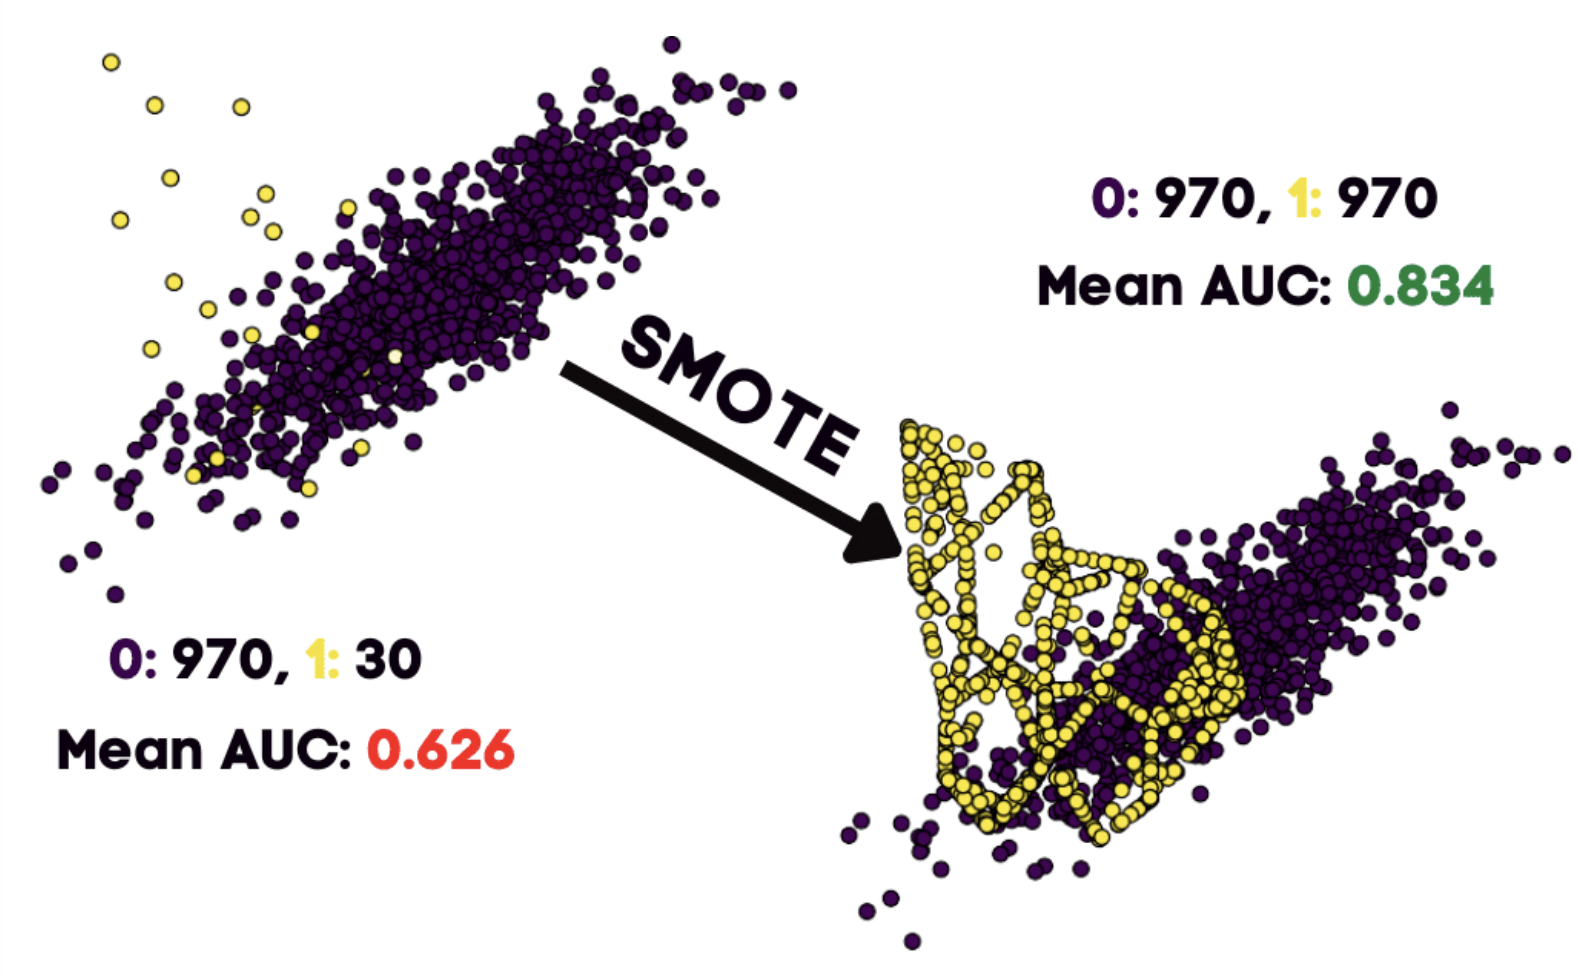

In [24]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
#!pip install xgboost

In [25]:
x.shape,y.shape

((124494, 13), (124494,))

In [26]:
y.value_counts()

failure
0    124388
1       106
Name: count, dtype: int64

In [27]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124494 entries, 0 to 124493
Data columns (total 13 columns):
 #   Column      Non-Null Count   Dtype
---  ------      --------------   -----
 0   attribute1  124494 non-null  int64
 1   attribute2  124494 non-null  int64
 2   attribute3  124494 non-null  int64
 3   attribute4  124494 non-null  int64
 4   attribute5  124494 non-null  int64
 5   attribute6  124494 non-null  int64
 6   attribute8  124494 non-null  int64
 7   attribute9  124494 non-null  int64
 8   month       124494 non-null  int32
 9   day         124494 non-null  int32
 10  device_S1F  124494 non-null  int64
 11  device_W1F  124494 non-null  int64
 12  device_Z1F  124494 non-null  int64
dtypes: int32(2), int64(11)
memory usage: 11.4 MB


In [30]:
def fnc_classification_all_model(x,y):
    from sklearn.naive_bayes import GaussianNB
    from sklearn.naive_bayes import BernoulliNB
    from sklearn.svm import SVC
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.linear_model import LogisticRegression
    from sklearn.ensemble import GradientBoostingClassifier
    from xgboost import XGBClassifier
    
    import imblearn
    from imblearn.under_sampling import RandomUnderSampler
    from imblearn.metrics import geometric_mean_score, make_index_balanced_accuracy, classification_report_imbalanced

    from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
    from sklearn.metrics import confusion_matrix,classification_report
              
    g=GaussianNB()
    b=BernoulliNB()
    KN=KNeighborsClassifier()
    D=DecisionTreeClassifier()
    R=RandomForestClassifier()
    Log=LogisticRegression()
    XGB=XGBClassifier()
    G=GradientBoostingClassifier()
      
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42)
    
    
    algos=[g,b,KN,D,R,Log,XGB,G]
    algo_names=['GaussianNB','BernoulliNB','KNeighborsClassifier','DecisionTreeClassifier','RandomForestClassifier','LogisticRegression','XGBClassifier','GradientBoostingClassifier']
    
    accuracy_scored=[]
    precision_scored=[]
    recall_scored=[]
    f1_scored=[]
    
    for item in algos:
        print(item)
        
        predict=item.fit(x_over,y_over).predict(x_test)
        
        
        accuracy_scored.append(accuracy_score(y_test,predict))
        precision_scored.append(precision_score(y_test,predict))
        recall_scored.append(recall_score(y_test,predict))
        f1_scored.append(f1_score(y_test,predict))

    result=pd.DataFrame(columns=['accuracy_score','f1_score','recall_score','precision_score'],index=algo_names)
    result['accuracy_score']=accuracy_scored
    result['f1_score']=f1_scored
    result['recall_score']=recall_scored
    result['precision_score']=precision_scored
    
    return result.sort_values('accuracy_score',ascending=False)

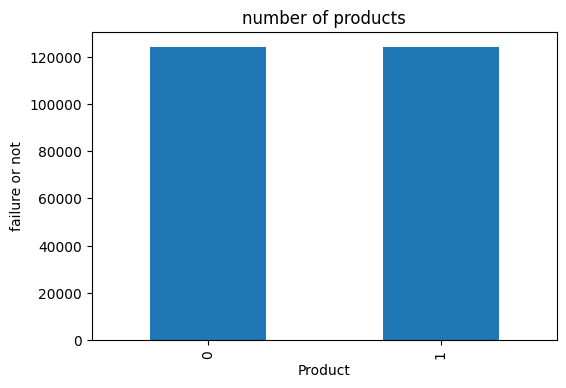

In [31]:
# over sampling
over = SMOTE()
x_over, y_over = over.fit_resample(x, y)

product_counts = y_over.value_counts()

plt.figure(figsize=(6, 4))
product_counts.plot(kind='bar')
plt.xlabel('Product')
plt.ylabel('failure or not')
plt.title('number of products')
plt.show()

In [32]:
y_over.value_counts()

failure
0    124388
1    124388
Name: count, dtype: int64

In [33]:
fnc_classification_all_model(x_over,y_over)

GaussianNB()
BernoulliNB()
KNeighborsClassifier()
DecisionTreeClassifier()
RandomForestClassifier()
LogisticRegression()
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)
GradientBoostingClassifier()


,accuracy_score,f1_score,recall_score,precision_score
DecisionTreeClassifier,1.000000,1.000000,1.000000,1.000000
RandomForestClassifier,1.000000,1.000000,1.000000,1.000000
XGBClassifier,0.999920,0.999920,0.999936,0.999904
GradientBoostingClassifier,0.980947,0.981060,0.982269,0.979854
BernoulliNB,0.926279,0.925516,0.911727,0.939729
KNeighborsClassifier,0.906132,0.910441,0.949750,0.874256
LogisticRegression,0.693105,0.609585,0.476924,0.844489
GaussianNB,0.579493,0.286431,0.168000,0.970779


## Deep Learning with Smote

In [34]:
over = SMOTE()
x_over, y_over = over.fit_resample(x, y)
x_train,x_test,y_train,y_test=train_test_split(x_over,y_over,random_state=42)


In [35]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

2024-02-09 07:01:34.486332: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-09 07:01:34.486438: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-09 07:01:34.613825: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [36]:
model=Sequential()
model.add(Dense(13,activation='relu'))
model.add(Dense(20,activation='relu'))
model.add(Dense(60,activation='relu'))
model.add(Dense(30,activation='relu'))
model.add(Dense(2,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics='accuracy')

In [37]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124494 entries, 0 to 124493
Data columns (total 13 columns):
 #   Column      Non-Null Count   Dtype
---  ------      --------------   -----
 0   attribute1  124494 non-null  int64
 1   attribute2  124494 non-null  int64
 2   attribute3  124494 non-null  int64
 3   attribute4  124494 non-null  int64
 4   attribute5  124494 non-null  int64
 5   attribute6  124494 non-null  int64
 6   attribute8  124494 non-null  int64
 7   attribute9  124494 non-null  int64
 8   month       124494 non-null  int32
 9   day         124494 non-null  int32
 10  device_S1F  124494 non-null  int64
 11  device_W1F  124494 non-null  int64
 12  device_Z1F  124494 non-null  int64
dtypes: int32(2), int64(11)
memory usage: 11.4 MB


In [38]:
history=model.fit(x_train,y_train,epochs=10,batch_size=10,verbose=1,validation_data=(x_test,y_test))

Epoch 1/10


I0000 00:00:1707462107.943949     134 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


18659/18659 [==============================] - 76s 4ms/step - loss: 12.3386 - accuracy: 0.5012 - val_loss: 0.6931 - val_accuracy: 0.4976
Epoch 2/10
18659/18659 [==============================] - 72s 4ms/step - loss: 0.6932 - accuracy: 0.4980 - val_loss: 0.6932 - val_accuracy: 0.4976
Epoch 3/10
18659/18659 [==============================] - 72s 4ms/step - loss: 0.6932 - accuracy: 0.4998 - val_loss: 0.6932 - val_accuracy: 0.4976
Epoch 4/10
18659/18659 [==============================] - 72s 4ms/step - loss: 0.6931 - accuracy: 0.5020 - val_loss: 0.6932 - val_accuracy: 0.5024
Epoch 5/10
18659/18659 [==============================] - 72s 4ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.4976
Epoch 6/10
18659/18659 [==============================] - 71s 4ms/step - loss: 0.6932 - accuracy: 0.4990 - val_loss: 0.6931 - val_accuracy: 0.5024
Epoch 7/10
18659/18659 [==============================] - 72s 4ms/step - loss: 0.6931 - accuracy: 0.5012 - val_loss: 0.6931 - va

In [39]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 13)                182       
                                                                 
 dense_1 (Dense)             (None, 20)                280       
                                                                 
 dense_2 (Dense)             (None, 60)                1260      
                                                                 
 dense_3 (Dense)             (None, 30)                1830      
                                                                 
 dense_4 (Dense)             (None, 2)                 62        
                                                                 
 dense_5 (Dense)             (None, 1)                 3         
                                                                 
Total params: 3617 (14.13 KB)
Trainable params: 3617 (14

In [40]:
model.evaluate(x_test,y_test)

1944/1944 [==============================] - 4s 2ms/step - loss: 0.6932 - accuracy: 0.5024


[0.6931581497192383, 0.5023635625839233]

# Undersampling using Tomek Links

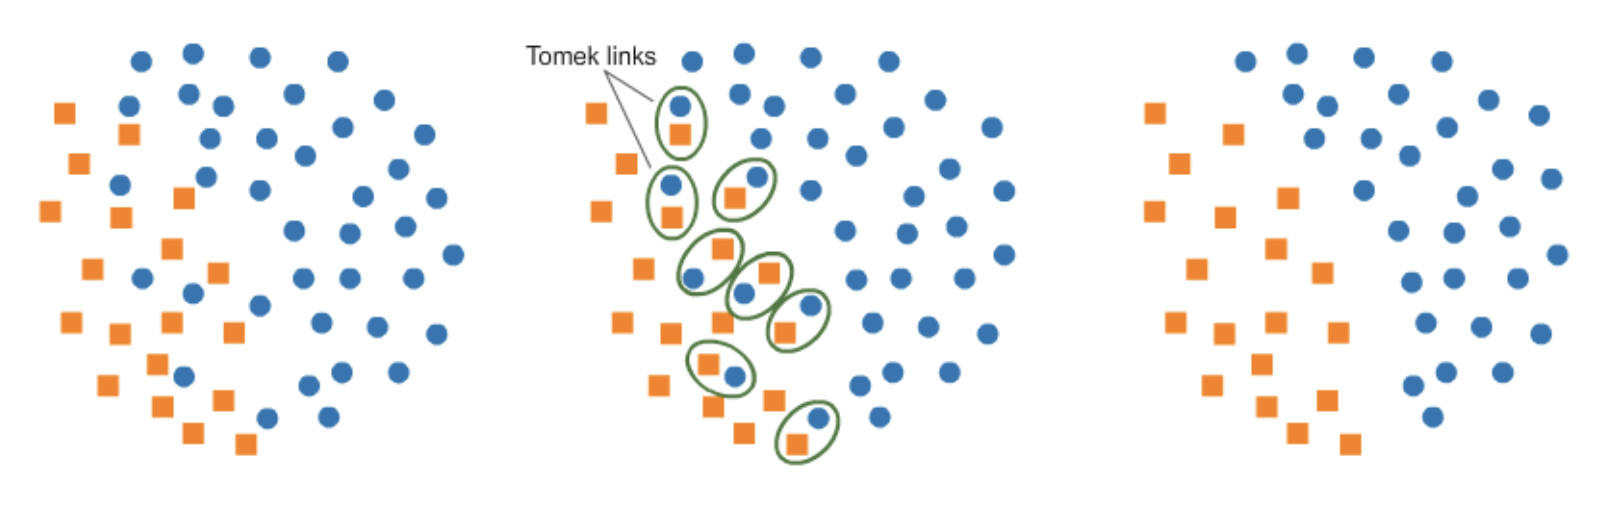

In [41]:
from imblearn.under_sampling import TomekLinks


## Deep learning with Tomek Links

In [46]:
tl = TomekLinks(sampling_strategy='majority')
x_tl, y_tl = tl.fit_resample(x, y)
x_train,x_test,y_train,y_test=train_test_split(x_tl,y_tl,random_state=13)


In [47]:
model=Sequential()
model.add(Dense(13,activation='relu'))
model.add(Dense(20,activation='relu'))
model.add(Dense(60,activation='relu'))
model.add(Dense(30,activation='relu'))
model.add(Dense(2,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics='accuracy')

In [48]:
history=model.fit(x_train,y_train,epochs=10,batch_size=10,verbose=1,validation_data=(x_test,y_test))

Epoch 1/10
9333/9333 [==============================] - 38s 4ms/step - loss: 218.4085 - accuracy: 0.9983 - val_loss: 0.0110 - val_accuracy: 0.9992
Epoch 2/10
9333/9333 [==============================] - 36s 4ms/step - loss: 80.4881 - accuracy: 0.9991 - val_loss: 0.0069 - val_accuracy: 0.9992
Epoch 3/10
9333/9333 [==============================] - 36s 4ms/step - loss: 0.0070 - accuracy: 0.9991 - val_loss: 0.0068 - val_accuracy: 0.9992
Epoch 4/10
9333/9333 [==============================] - 36s 4ms/step - loss: 0.0069 - accuracy: 0.9991 - val_loss: 0.0068 - val_accuracy: 0.9992
Epoch 5/10
9333/9333 [==============================] - 36s 4ms/step - loss: 0.0069 - accuracy: 0.9991 - val_loss: 0.0068 - val_accuracy: 0.9992
Epoch 6/10
9333/9333 [==============================] - 36s 4ms/step - loss: 0.0069 - accuracy: 0.9991 - val_loss: 0.0068 - val_accuracy: 0.9992
Epoch 7/10
9333/9333 [==============================] - 36s 4ms/step - loss: 0.0069 - accuracy: 0.9991 - val_loss: 0.0068 - val

In [49]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 13)                182       
                                                                 
 dense_7 (Dense)             (None, 20)                280       
                                                                 
 dense_8 (Dense)             (None, 60)                1260      
                                                                 
 dense_9 (Dense)             (None, 30)                1830      
                                                                 
 dense_10 (Dense)            (None, 2)                 62        
                                                                 
 dense_11 (Dense)            (None, 1)                 3         
                                                                 
Total params: 3617 (14.13 KB)
Trainable params: 3617 (

In [50]:
model.evaluate(x_test,y_test)

973/973 [==============================] - 2s 2ms/step - loss: 0.0068 - accuracy: 0.9992


[0.006758582312613726, 0.9991642832756042]

<Axes: >

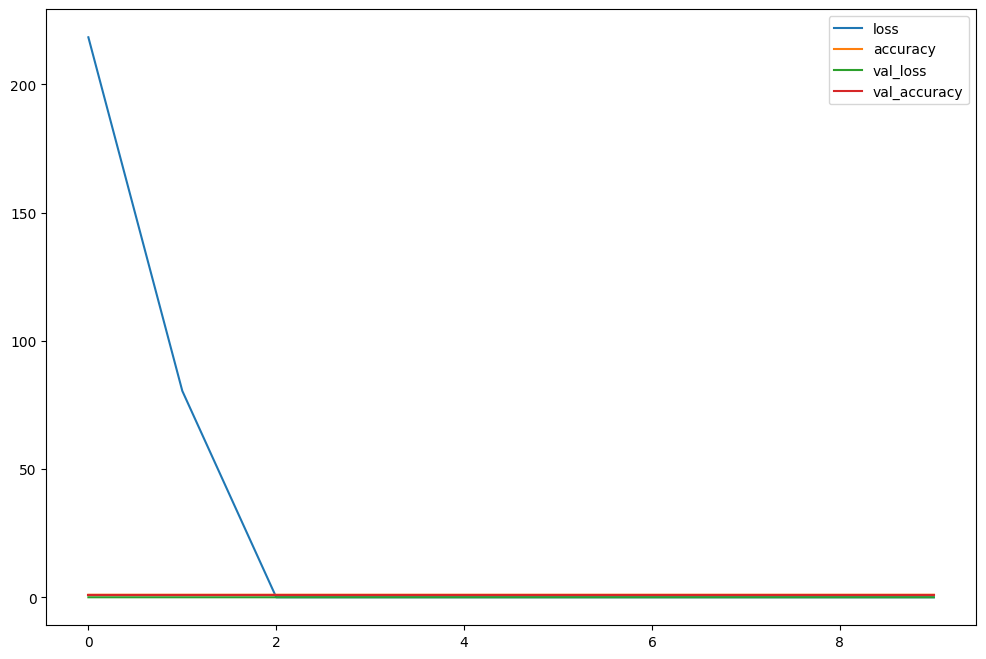

In [51]:
loss_df=pd.DataFrame(history.history)
loss_df.plot(figsize=(12,8))